In [11]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
df = pd.read_csv("/content/Resume.csv",error_bad_lines=False, engine="python")

df.head()
print(df.columns)

<ipython-input-14-7d82bc375967>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/Resume.csv",error_bad_lines=False, engine="python")
Skipping line 370: unexpected end of data


Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')


In [15]:
def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub('http\S+\s*', ' ', txt)  # remove URLs
    txt = re.sub('RT|cc', ' ', txt)  # remove RT and cc
    txt = re.sub('#\S+', '', txt)  # remove hashtags
    txt = re.sub('@\S+', '  ', txt)  # remove mentions
    txt = re.sub('\s+', ' ', txt)  # remove extra whitespace
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]


    return ' '.join(txt)

In [16]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume_str'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

LookupError: ignored

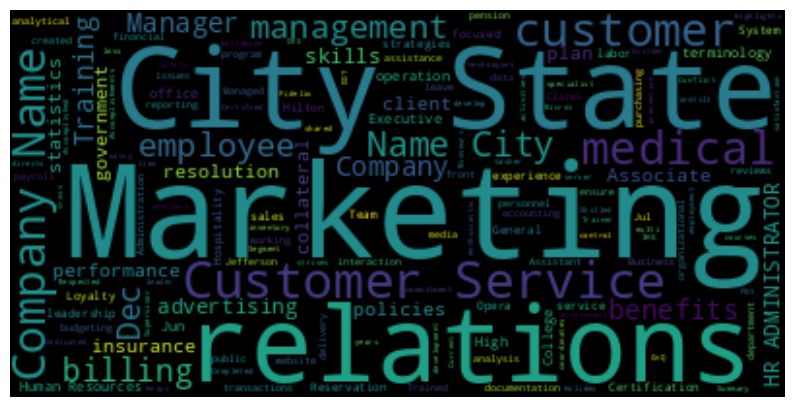

In [20]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
categories = np.sort(df['Category'].unique())
categories

array(['DESIGNER', 'HR', 'INFORMATION-TECHNOLOGY', 'TEACHER'],
      dtype=object)

In [22]:
# create new df for corpus and category
df_categories = [df[df['Category'] == category].loc[:, ["Resume_str", 'Category']] for category in categories]
df_categories

[                                            Resume_str  Category
 110           DESIGNER       Summary     Designer w...  DESIGNER
 111           DESIGNER       Summary      Establish...  DESIGNER
 112           DESIGNER       Summary     To get a s...  DESIGNER
 113           DESIGNER / TECHNICAL DESIGNER        ...  DESIGNER
 114           MULTIMEDIA DESIGNER AND GRAPHIC DESIG...  DESIGNER
 ..                                                 ...       ...
 212             SALES CONSULTANT, INTERIOR DESIGNER...  DESIGNER
 213           OSP ENGINEERING DESIGNER           Ex...  DESIGNER
 214           SENIOR DIGITAL DESIGNER             E...  DESIGNER
 215           FINE JEWELRY CAD DESIGNER       Summa...  DESIGNER
 216           LEAD INSTRUCTIONAL DESIGNER       Sum...  DESIGNER
 
 [107 rows x 2 columns],
                                             Resume_str Category
 0             HR ADMINISTRATOR/MARKETING ASSOCIATE\...       HR
 1             HR SPECIALIST, US HR OPERATIONS     

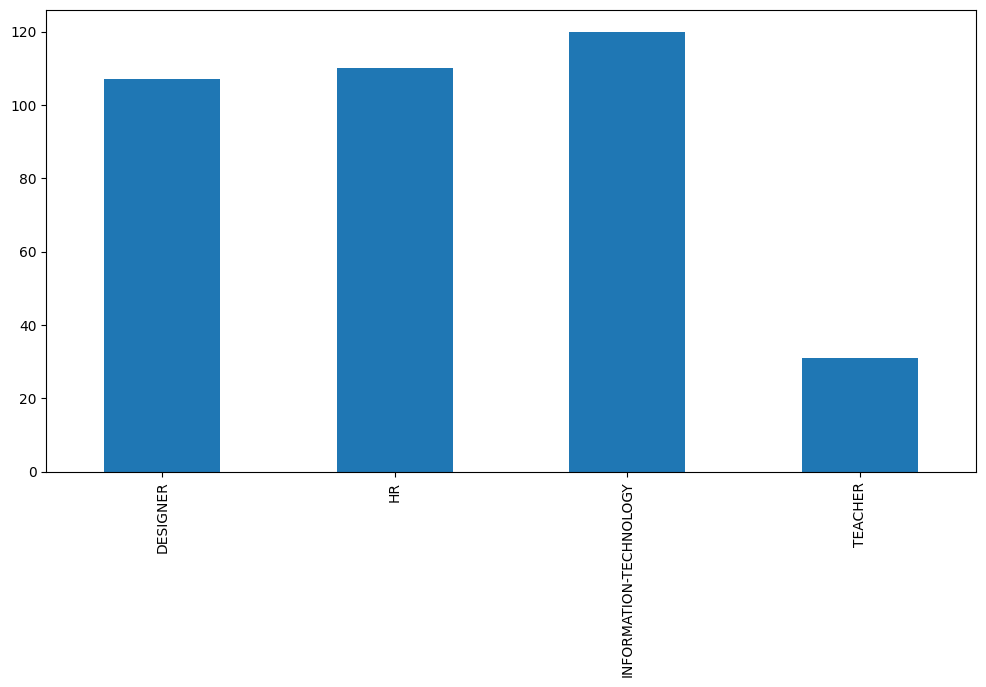

In [23]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [24]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resume'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

In [25]:
def wordfreq(df):
    count = df['Resume'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

In [26]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [27]:
df.Category.value_counts()

2    120
1    110
0    107
3     31
Name: Category, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['Resume_str'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


In [29]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

(294, 14719)
(74, 14719)


In [31]:
# Split for train and test
train_split = 0.8
train_size = int(train_split * len(df))

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

294
74


In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize feature data
vocab_size = 6000
oov_tok = '<>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)

{'<>': 1, 'and': 2, 'to': 3, 'of': 4, 'the': 5, 'for': 6, 'in': 7, 'with': 8, 'a': 9, 'state': 10, 'company': 11, 'management': 12, 'city': 13, 'on': 14, 'name': 15, 'as': 16, 'all': 17, 'information': 18, 'design': 19, 'business': 20, 'hr': 21, 'skills': 22, 'new': 23, 'training': 24, 'support': 25, 'development': 26, 'project': 27, 'systems': 28, 'system': 29, 'employee': 30, 'by': 31, 'data': 32, '－': 33, 'experience': 34, 'technology': 35, 'team': 36, 'customer': 37, 'software': 38, 'i': 39, 'network': 40, 'office': 41, 'service': 42, 'human': 43, 'work': 44, 'including': 45, 'it': 46, 'that': 47, 'education': 48, 'from': 49, 'manager': 50, 'employees': 51, 'microsoft': 52, 'process': 53, 'or': 54, 'technical': 55, 'professional': 56, 'staff': 57, 'performance': 58, 'university': 59, '\xa0': 60, 'designer': 61, 'an': 62, 'at': 63, 'resources': 64, 'developed': 65, 'security': 66, 'program': 67, 'managed': 68, 'issues': 69, 'policies': 70, 'procedures': 71, 'administration': 72, 'cr

In [33]:
from sklearn.utils import shuffle

features = df['Resume_str'].values
original_labels = df['Category'].values
labels = original_labels[:]

for i in range(len(df)):

    labels[i] = str(labels[i].lower())  # convert to lowercase
    labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

features, labels = shuffle(features, labels)

# Print example feature and label
print(features[0])
print(labels[0])

AttributeError: ignored

In [34]:
# Pad sequences for feature data
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

print(train_feature_padded[0])
print(test_feature_padded[0])

[  21  342   92  248   21  342  145  924   37   42   50    8  651  165
    4   34    7 3297    2   37   42   12 4543 3117    2  452    4   37
  880  303 5069    3    1    9 1345 1731 2148    3   37   42  282  880
   14   37  509   36   12   92 2791  757  338  417   24    2   26  912
  419 2938   79  137  172  243 2412 4544  477   24  362  216   31    1
    7   37 3298    2   92   31 5879    1 3118  295   50   24  362 1520
 1138    6  703   84 3297   28  155   16    1    1    1 5070 3510    1
 5070 5880   29    1    1  326  636    2 1484    7   37   42   83  300
  270  230 1999 1942  238   75   12   85    2   58  678   34   21  342
   92  248   21  342 1346   96    3   86   11   15   33   13   10 4545
    3  149   70 5071    2 1732  140  155   16  260  200  623  137   81
   24    2   30  109 2516   30 3775 2227    2  143  181 4546  194    4
   81  144 1521  155   16  435    2 4117  196  106  849  155   16  652
  960 1690   58  546    2 1081    2   30 1522    6  624  211 5881   12
    7 

In [35]:
# Define the neural network
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  #tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 64)             384000    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 26)                1690      
                                                                 
Total params: 459994 (1.75 MB)
Trainable params: 459994 (1.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
!pip install tika

  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32621 sha256=73620b565299264e538ccc4e73c9f5fc87aea4b4901d51380574cb4a2741df7d
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


In [38]:
from tika import parser

In [40]:
file = r'/content/DIVYA RESUME.PDF.pdf.pdf'
file_data = parser.from_file(file)

2023-11-15 15:35:20,282 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
2023-11-15 15:35:20,867 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
2023-11-15 15:35:21,224 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [41]:
text = file_data['content']
print(text)






































DIVYA RESUME.PDF.pdf


DIVYALAKSHMI.M

PROFILE

SOFT SKILLS

ACHIEVEMENT

TECHNICAL SKILLS 

WORKSHOP

CARRER OBJECTIVE

EDUCATION BACKGROUND

 
POSITION AND RESPONSIBILITY 

An inquistive learner looking forward for a
challenging position in a progressive organization
that will utilize my talents and provides with an
opportunity for a personal and professional growth.

Python 
Data structure
Basics of AI/ML
Data visualization
technique

Teamwork &
collaboration
Leadership skill
Communication
skill 
Creative thinking 

FATHER'S NAME :
K.MURALIDHARAN
D.O.B : 09/02/2004
NATIONALITY : Indian
LANGUAGES : Tamil,
English 

SRUJAN FEST(2K22) 
Poster designing 2nd place 
ERUPTA(2K23) 

Paper presentation 1st place
CLOUDUS(2K23) 

BEST IDEA 2nd Place 

Attended LINGUAL SKILLS Workshop
Certification in PYTHON Basics
Completed  5 Days Hands -on training  in
Cross aPlatform App Developement  Using
APACHE CORDOVA 

MICROSOFT - Alpha learn student ambassador
(MLS

In [43]:
parsed_content = {}

In [44]:
#E-MAIL
import re
def get_email_addresses(string):
    r = re.compile(r'[\w\.-]+@[\w\.-]+')
    return r.findall(string)

email = get_email_addresses(text)
print(email)
parsed_content['E-mail'] = email

['divyalakshmim21ad@psnacet']


In [45]:
#PHONE NUMBER
import re
def get_phone_numbers(string):
    r = re.compile(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})')
    phone_numbers = r.findall(string)
    return [re.sub(r'\D', '', num) for num in phone_numbers]

phone_number= get_phone_numbers(text)
if len(phone_number) <= 10:
    print(phone_number)
    parsed_content['Phone number'] = phone_number

['6383125465']


In [46]:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

def extract_name(text):
   nlp_text = nlp(text)

   # First name and Last name are always Proper Nouns
   pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]

   matcher.add('NAME', [pattern], on_match = None)

   matches = matcher(nlp_text)

   for match_id, start, end in matches:
       span = nlp_text[start:end]
       return span.text

name = extract_name(text)
print(name)
parsed_content['Name'] =  name

TECHNICAL SKILLS
